In [15]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
from easyocr import easyocr, Reader

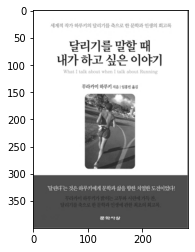

In [16]:

url = r'C:\Users\jinhee\project_readvice\readvice_easyOCR\data\images\2.jpg'
img = cv2.imread(url)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

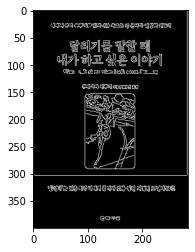

In [17]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [18]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [19]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [20]:
location

array([[[  2,   0]],

       [[  0, 301]],

       [[282, 303]],

       [[283,   1]]], dtype=int32)

In [21]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

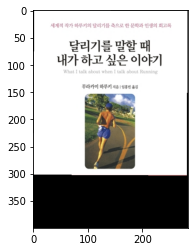

In [22]:

plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [23]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

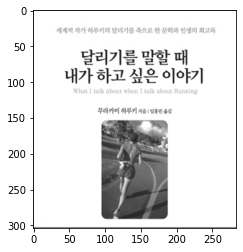

In [24]:

plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [28]:

langs = ['ko', 'en']
reader = Reader(lang_list=langs, gpu=True)
result = reader.readtext(cropped_image,  detail = 0)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


["시겨시 사가 하구기어 다이기: 3말'",
 '문하다 어뤄이 피하다',
 '달리기틀 말할 때',
 '내가 하고 싶은 이야기',
 'uuk ubuut wrun !ialx Mwrib Ftuiuunl',
 '부다가미 하무기 다툼 | 회불면 옳다']

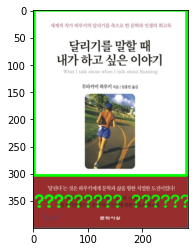

In [37]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))

